In [1]:
from keras import layers, models

Using TensorFlow backend.


In [17]:
class ANN(models.Model):
    def __init__(self,Nin,Nh, Nout):
        
        #네트워크 구성 정의
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        
        #네트워크 구성 연결
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)
        
        super().__init__(x,y)
        self.compile(loss='mse',optimizer = 'sgd')
        

In [4]:
#학습과 평가용 데이터 불러오기

from keras import datasets
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return (X_train, y_train), (X_test, y_test)

In [9]:
#회귀 ANN 학습 결과 그래프 구현
import matplotlib.pyplot as plt
from kerasplot import plot_loss

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 549.2299 - val_loss: 544.1246
Epoch 2/100
 - 0s - loss: 390.5700 - val_loss: 103.3929
Epoch 3/100
 - 0s - loss: 98.1901 - val_loss: 85.2140
Epoch 4/100
 - 0s - loss: 77.4438 - val_loss: 81.0683
Epoch 5/100
 - 0s - loss: 66.6654 - val_loss: 61.9228
Epoch 6/100
 - 0s - loss: 61.4270 - val_loss: 65.4058
Epoch 7/100
 - 0s - loss: 71.9419 - val_loss: 58.9549
Epoch 8/100
 - 0s - loss: 51.9858 - val_loss: 93.1046
Epoch 9/100
 - 0s - loss: 62.5920 - val_loss: 62.6678
Epoch 10/100
 - 0s - loss: 47.1879 - val_loss: 53.1253
Epoch 11/100
 - 0s - loss: 42.8130 - val_loss: 49.0748
Epoch 12/100
 - 0s - loss: 40.8272 - val_loss: 41.4224
Epoch 13/100
 - 0s - loss: 38.3668 - val_loss: 54.4867
Epoch 14/100
 - 0s - loss: 42.8160 - val_loss: 41.1170
Epoch 15/100
 - 0s - loss: 40.6437 - val_loss: 44.5767
Epoch 16/100
 - 0s - loss: 34.1632 - val_loss: 44.1284
Epoch 17/100
 - 0s - loss: 32.6142 - val_loss: 35.6701
Epoch 18/100
 - 0s - loss

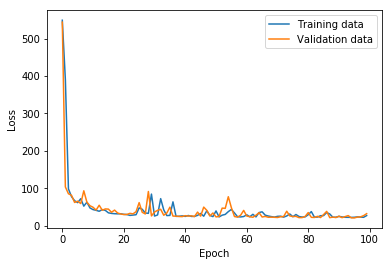

In [20]:
def main():
    Nin = 13 
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs=100,
                       batch_size = 100, validation_split = 0.2,
                       verbose = 2 )
    
    performance_test = model.evaluate(X_test, y_test, batch_size = 100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))
    
    plot_loss(history)
    plt.show()
    
if __name__ == '__main__':
    main()